<a href="https://colab.research.google.com/github/06bhavi/VOIS_AICTE_Oct2025_Bhavini-Ajmera/blob/main/Bhavini_ajmera_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
#read data
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv',low_memory=False)


In [5]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23699 non-null  int64  
 1   NAME                            23623 non-null  object 
 2   host id                         23699 non-null  int64  
 3   host_identity_verified          23604 non-null  object 
 4   host name                       23659 non-null  object 
 5   neighbourhood group             23671 non-null  object 
 6   neighbourhood                   23682 non-null  object 
 7   lat                             23690 non-null  float64
 8   long                            23690 non-null  float64
 9   country                         23611 non-null  object 
 10  country code                    23619 non-null  object 
 11  instant_bookable                23619 non-null  object 
 12  cancellation_policy             

In [7]:
df.duplicated().value_counts()

,count
False,23699


In [8]:
#Neighbourhood group was "brookln" instead of "Brooklyn"
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


Problems Identified within the Data

-541 duplicated Records where found in the Data.

-Insufficient information were recorded for the house_rules and Licence columns.

-Dollar signs and commas recorded along with the values for price and service fee.

-The currency for price and service fee were not added to the column's titles.

-Missing values in some records

-Columns like the price, service fee, id, host id, last review, Construction    year are assigned wrong datatypes

-In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.

-Some outliers were identified in the availability 365 column.

CLEAN THE DATA

-Steps to be Taken for Data Cleaning

-Drop duplicated records.

-Drop house rules and license columns with insufficient data.

-Remove all dollar signs in the price and service fee columns.

-Remove all commas from the price and service fee columns.

-Rename the price and service fee columns to include a dollar signs.

-Drop all records with missing values

-Change all mismatched data types to the appropriate once
-Correct the Spelling of 'brookin' to 'Brooklyn'

-Get rid of outliers in the 'availability 365' column data

In [9]:
#drop duplicate records
df.drop_duplicates(inplace = True)
#drop house_rules and license columns with insufficient data

df.drop(columns=['house_rules', 'license'], inplace=True)



In [10]:
#Remove all dollar signs in the price and service fee columns

df['price'] = df['price'].str.replace('$','', regex = False)

df['service fee'] = df['service fee'].str.replace('$','', regex= False)

#Remove all commas in the price and service fee columns

df['price'] = df['price'].str.replace(',','', regex= False)

df['service fee'] = df['service fee'].str.replace(',','', regex= False)

#Rename the price and service fee columns to include a dollar sign

df.rename(columns = { 'price': 'price_$','service fee': 'service_fee_$'}, inplace =True)

#Drop all records with missing values

df.dropna(inplace = True)

#Change all mismatched data types to the appropriate once.

df [ 'price_$']= df['price_$'].astype(float)

df['service_fee_$'] = df['service_fee_$'].astype(float)

df['id'] = df['id'].astype(str)

df['host id'] = df['host id'].astype(str)

df['last review']=  pd.to_datetime(df['last review'])

df['Construction year'] = df['Construction year'].astype(int)
# correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] ='Brooklyn'

#get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365']>500].index)


In [11]:
df.duplicated().value_counts()

,count
False,18923


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18923 entries, 0 to 23697
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18923 non-null  object        
 1   NAME                            18923 non-null  object        
 2   host id                         18923 non-null  object        
 3   host_identity_verified          18923 non-null  object        
 4   host name                       18923 non-null  object        
 5   neighbourhood group             18923 non-null  object        
 6   neighbourhood                   18923 non-null  object        
 7   lat                             18923 non-null  float64       
 8   long                            18923 non-null  float64       
 9   country                         18923 non-null  object        
 10  country code                    18923 non-null  object        
 11  instant

In [13]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,18923.000000,18923.000000,18923.00000,18923.000000,18923.000000,18923.000000,18923.000000,18923,18923.000000,18923.000000,18923.000000,18923.000000
mean,40.728806,-73.955287,2012.48914,620.567510,124.115679,7.061882,41.017069,2018-04-26 12:24:32.493790464,0.966867,2.996724,3.347672,176.876024
min,40.508680,-74.239860,2003.00000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688540,-73.982635,2008.00000,329.000000,66.000000,2.000000,4.000000,2017-04-03 12:00:00,0.110000,2.000000,1.000000,50.000000
50%,40.722270,-73.956880,2012.00000,616.000000,123.000000,3.000000,14.000000,2019-01-01 00:00:00,0.370000,3.000000,1.000000,170.000000
75%,40.763950,-73.940350,2017.00000,911.000000,182.000000,5.000000,56.000000,2019-06-17 00:00:00,1.340000,4.000000,2.000000,296.000000
max,40.908040,-73.712990,2022.00000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,16.220000,5.000000,121.000000,426.000000
std,0.054067,0.040721,5.76443,334.117933,66.826473,21.958124,59.472427,NaN,1.330804,1.418538,10.965782,134.443459


What are different property types in the Dataset?


In [14]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,10426
Private room,8225
Shared room,272


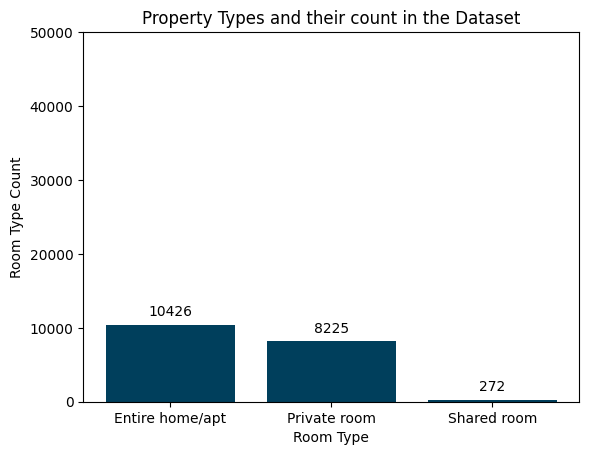

In [15]:
#Room type count plotted on a barchart

room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"], color='#003f5c');

plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);

plt.ylim([0,50000]);

plt.xlabel('Room Type');

plt.ylabel('Room Type Count');

plt.title('Property Types and their count in the Dataset');

The Airbnb open dataset reveals four distinct property or room types. These categories comprise;

Entire home/apt

Private room

Shared room

Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurrences, followed by Private room with 37,494 occurrences. Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.

Which neighbourhood group has the highest number of listings?

In [16]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,8444
Brooklyn,8275
Queens,1774
Bronx,314
Staten Island,116


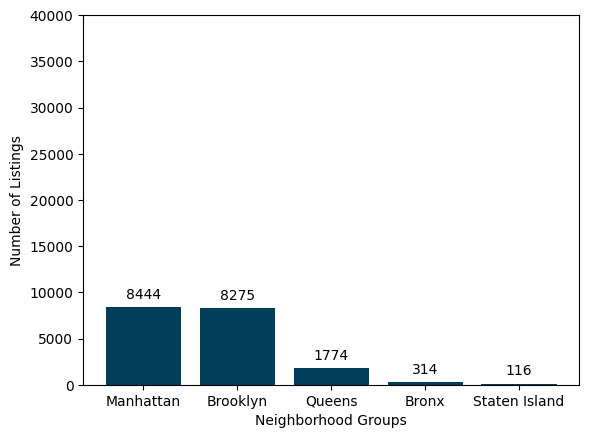

In [17]:
#which neighborhood group has the highest number of listings?

hood_group_bar= plt.bar(hood_group.index, hood_group.loc[:, "count"],color='#003f5c');

plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding=4);

plt.ylim([0,40000]);

plt.xlabel('Neighborhood Groups');

plt.ylabel('Number of Listings');

Which neighborhoods group have the highest average prices for Airbnb listings?


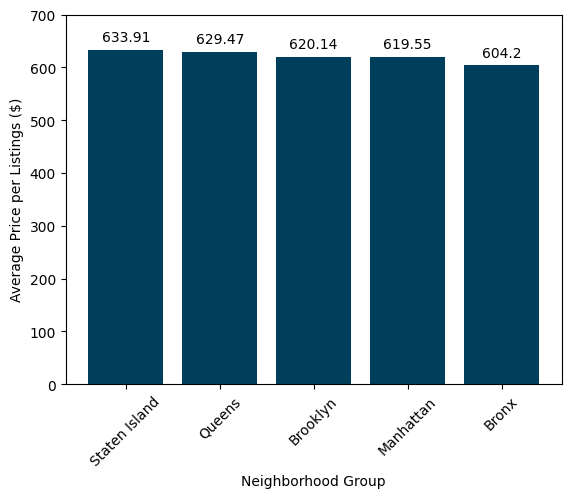

In [18]:

#which neighborhoods group have the highest average prices for Airbnb listings?

avg_price = df.groupby('neighbourhood group') ['price_$'].mean().sort_values(ascending= False).to_frame()

avg_price_bar= plt.bar(avg_price.index, avg_price.loc[:, 'price_$'],color='#003f5c');

plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"], 2), label_type = 'edge', padding=4);

plt.ylim([0,700]);

plt.xlabel('Neighborhood Group');

plt.ylabel('Average Price per Listings ($)');

plt.xticks(rotation = 45);

Is there a relationship between the construction year of property and price?




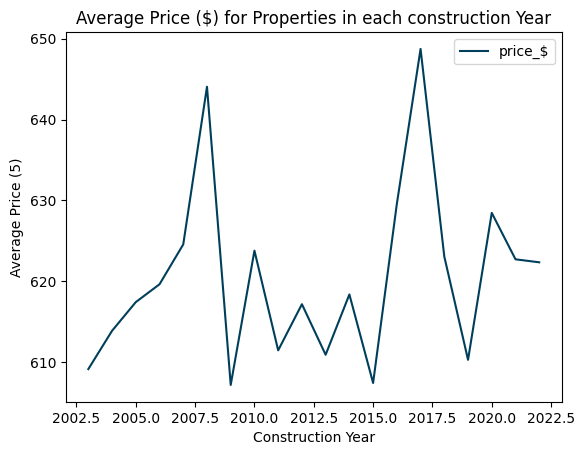

In [19]:



#is there a relationship between the construction year of property and price?

df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot(color='#003f5c');

plt.xlabel('Construction Year');

plt.ylabel('Average Price (5)');

plt.title('Average Price ($) for Properties in each construction Year');

**Who are the top 10 hosts by calculated host listing count?**


From the numerous hosts in the dataset, we will see the 10 hosts with the highest calculated host count


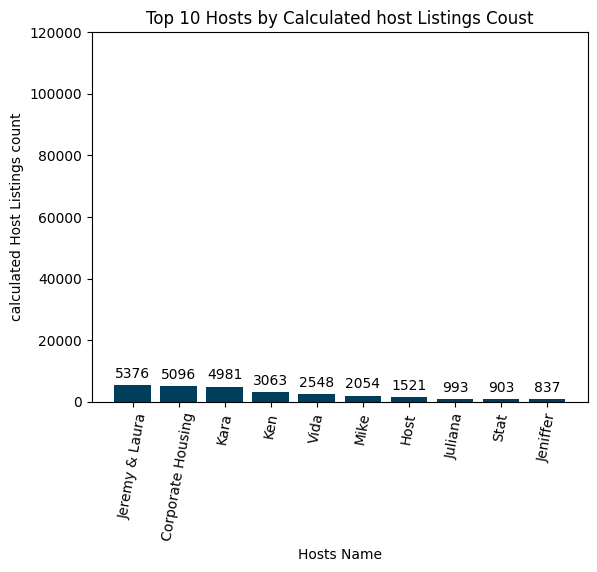

In [20]:
#who are the top 10 hosts by calculated host listing count?

hosts= df.groupby('host name')[ 'calculated host listings count'].sum().sort_values(ascending= False).nlargest (10). to_frame()


hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count' ],color='#003f5c');

plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding=3);

plt.xlabel('Hosts Name');

plt.ylabel('calculated Host Listings count');

plt.xticks(rotation =80);

plt.ylim([0, 120000]);

plt.title('Top 10 Hosts by Calculated host Listings Coust');

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings Subsequently, the other hosts follow in descending order.

Karen at second postion with 42410 hosts

Jeniffer at third position with 31447 hosts

Blueground at fourth position with 21168 hosts

Kaz at fifth position with 17552 hosts

Corporate Housing at sixth position with 14833 hosts

Soya at seventh positon with 10260 hosts

Stay with vibe at eight position with 10260 hosts

Kara at ninth position with 10092 hosts

and finally Jeremy and Laura at tenth position 10080 hosts



**Are hosts with verified identities more likely to receive positive reviews?**

In [21]:
#Are hosts with verified identities more likely to receive positive reviews?

review =df.groupby('host_identity_verified') ['review rate number'].mean().sort_values(ascending= False).to_frame()

review

,review rate number
host_identity_verified,
verified,3.004151
unconfirmed,2.989399


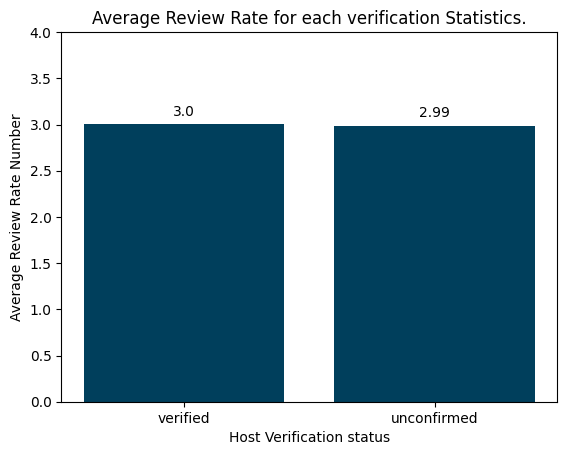

In [22]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"], color='#003f5c');

plt.bar_label(review_bar, labels= round(review.loc[:, "review rate number"], 2), padding = 4);

plt.ylim([0,4]);

plt.xlabel('Host Verification status');

plt.ylabel('Average Review Rate Number');

plt.title('Average Review Rate for each verification Statistics.');

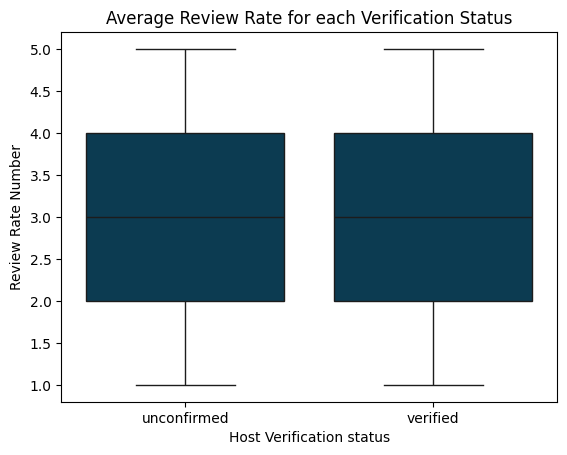

In [23]:
base_color =sns.color_palette()[0]

sns.boxplot(data= df, x ="host_identity_verified", y= "review rate number", color= '#003f5c');

plt.xlabel('Host Verification status');

plt.ylabel('Review Rate Number');

plt.title('Average Review Rate for each Verification Status');

The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.







**Is there a correlation between the price of a listing and its service fee?**

In [24]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999910549576536)

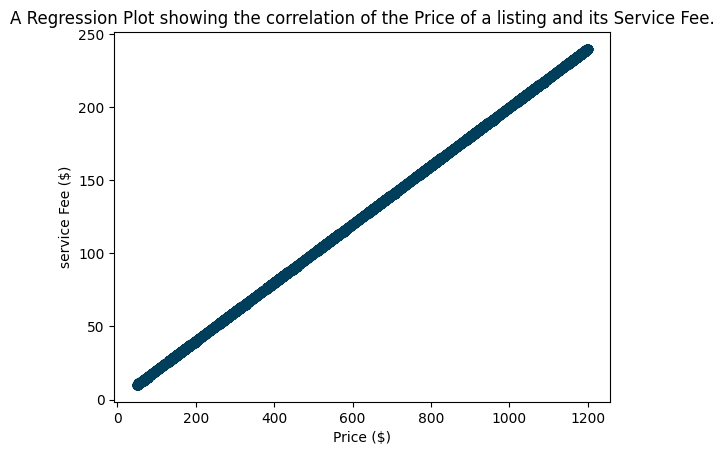

In [25]:
sns.regplot (df, x ='price_$', y= 'service_fee_$', color='#003f5c');

plt.xlabel('Price ($)');

plt.ylabel('service Fee ($)');

plt.title('A Regression Plot showing the correlation of the Price of a listing and its Service Fee.');



The Pearson correlation coefficient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.


**What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?**


In [26]:
#is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and renow df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to frame()

ARRN =df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.074074
                    Private room               2.944444
                    Shared room                2.625000
Brooklyn            Entire home/apt            2.955789
                    Private room               3.015316
                    Shared room                3.060000
Manhattan           Entire home/apt            3.016676
                    Private room               3.016466
                    Shared room                2.930233
Queens              Entire home/apt            2.953652
                    Private room               2.969815
                    Shared room                3.085714
Staten Island       Entire home/apt            2.950820
                    Private room               3.163636

/tmp/ipython-input-146754591.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data= df, x ='neighbourhood group', y= 'review rate number', hue= 'room type',palette=custom_palette);


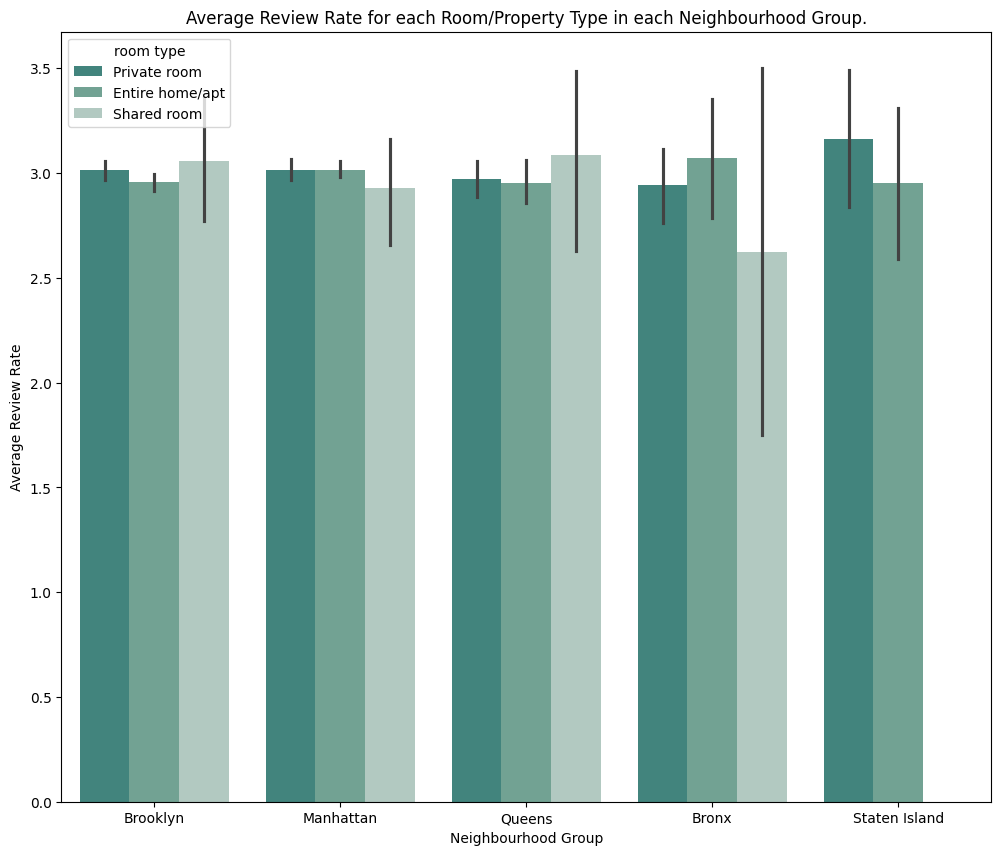

In [27]:
custom_palette = ['#378f86', '#6aaa96', '#aecdc2','#a0bfbb']
plt.figure(figsize =[12,10]);

sns.barplot(data= df, x ='neighbourhood group', y= 'review rate number', hue= 'room type',palette=custom_palette);

plt.xlabel('Neighbourhood Group');

plt.ylabel('Average Review Rate');

plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located Brooklyn, Manhattan, and Queens



**Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**

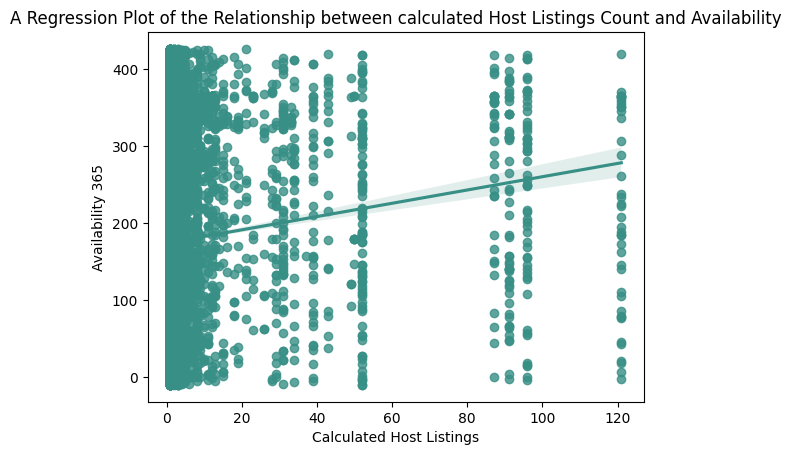

In [28]:
#are hosts with a higher calculated bost listings count more likely to maintain higher availability throughout the year?

sns.regplot(df, x ='calculated host listings count', y ='availability 365',color='#378f86');

plt.xlabel('Calculated Host Listings');

plt.ylabel('Availability 365');

plt.title('A Regression Plot of the Relationship between calculated Host Listings Count and Availability');

In [29]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.0702870613038873)

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.



**Conclusion**

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short term lodging industry.